In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Table of Contents
- [Introduction](#Introduction)
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Training](#Model-Training)
- [Results](#Results)

## Model Training
Some training steps...

## Results
Some results...

## Introduction

## Data Preprocessing

In [82]:
# Reading in the data

df = pd.read_csv('obesity_level.csv')

In [83]:
# Finding shape of data

df.shape

(20758, 18)

In [84]:
# Dropping any duplicates

df = df.drop_duplicates()

In [85]:
# Identifying null values

null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


### Cleaning up the columns 

In [86]:
# Remove id since it's the same as index

df = df.drop(columns=['id'])

In [87]:
# Renaming columns and fixing any spelling mistakes

df = df.rename(columns={'CH2O': 'water'})

df = df.rename(columns={'FAF': 'physical_activity_freq'})

df = df.rename(columns={'CALC': 'alcohol_con'})

df = df.rename(columns={'0be1dad': 'obesity_level'})

df['obesity_level'] = df['obesity_level'].replace({'0rmal_Weight': 'Normal_Weight'})

#### We have 18 Features and these are what each Feature represents:

- Gender [F or M]

- Age 

- Height [Height in M]

- Weight [Weight in KG]

- Family_history_with_overweight 

- FAVC (Frequent consumption of high-caloric food) [0 or 1]

- FCVC (Frequency of consumption of vegetables)

- NCP (Number of main meals)

- CAEC (Consumption of food between meals) [Sometimes, Frequency, Always, 0 (Never)]

- SMOKE [0 or 1]

- CH2O (Daily water consumption)

- SCC (Caloric beverages consumption) [0 or 1]

- physical_activity_frequency (Physical activity frequency)

- TUE (Time spent using technological devices) [In hours]

- alcohol_con (Consumption of alcohol) [Sometimes, Frequency, Always, 0 (Never)]

- MTRANS (Mode of transportation) [Public_Transportation, Automobile, Walking, Motorbike, Bike]

- obesity_level [Obesity_Type_III, Obesity_Type_II, normal_Weight, Obesity_Type_I, Insufficient_Weight, Overweight_Level_II, Overweight_Level_I]

The CAEC column (Consumption of food between meals) has the following unique options: Sometimes, Frequency, Always, 0. The 0 stands for 'never'. However, I want all of them to either be numerical or categorical so I'll change the 0 to never first.


In [88]:
print('The unique values are: ' + str(df['CAEC'].unique()))

df['CAEC'] = df['CAEC'].replace('0', 'Never')

print('The unique values are: ' + str(df['CAEC'].unique()))



The unique values are: ['Sometimes' 'Frequently' '0' 'Always']
The unique values are: ['Sometimes' 'Frequently' 'Never' 'Always']


Repeat the same thing but for 'alcohol_con' column

In [89]:
print('The unique values are: ' + str(df['alcohol_con'].unique()))

df['alcohol_con'] = df['alcohol_con'].replace('0', 'Never')

print('The unique values are: ' + str(df['alcohol_con'].unique()))



The unique values are: ['Sometimes' '0' 'Frequently']
The unique values are: ['Sometimes' 'Never' 'Frequently']


---

---

## Exploratory Data Analysis

### Obesity Level Distribution

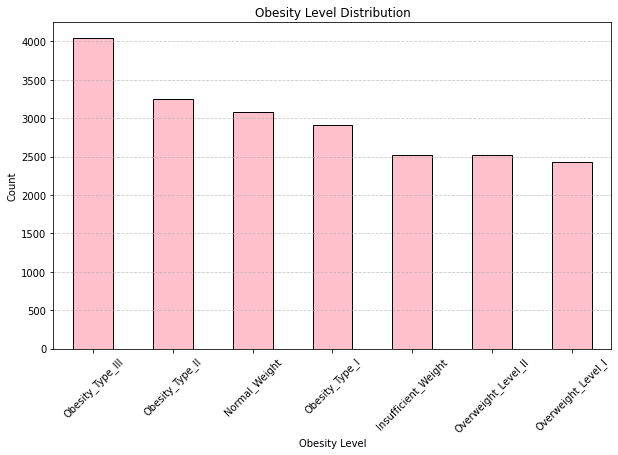

In [90]:
# Count of each obesity level
plt.figure(figsize=(10,6))
df['obesity_level'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title("Obesity Level Distribution")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***

### Investigating the relationship of family history in obesity and obesity levels

To investigate whether obesity runs in family and how it correlates with different obesity levels, I analyzed the proportion of individuals with a family history in obesity and compared to the the obesity categories. If there's a clear pattern, this suggests a potential influence so that individuals with obese family members have a higher likelihood of becoming obese themselves.

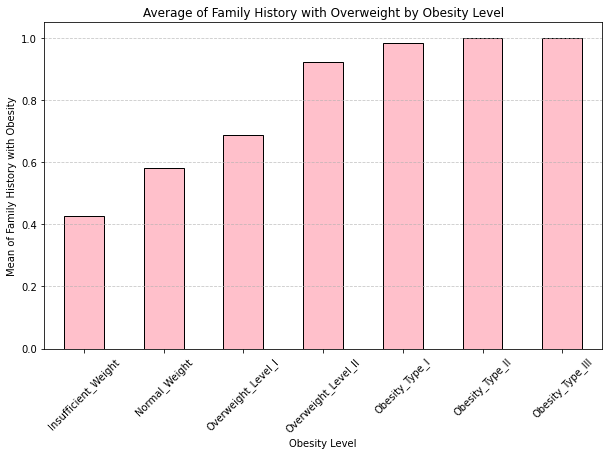

In [91]:
#Grouping data by obesity level and calculating the mean (proportion) of individuals with a family history of overweight
grouped_data = df.groupby(['obesity_level'])['family_history_with_overweight'].mean()

# Reordering the obesity level categories
grouped_data = grouped_data.reindex(['Insufficient_Weight', 'Normal_Weight',  'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

# Plotting Data
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Average of Family History with Overweight by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Mean of Family History with Obesity")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [92]:
df = pd.get_dummies(df, columns=['CAEC'], prefix='CAEC', dtype=int)

df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

df = pd.get_dummies(df, columns=['alcohol_con'], prefix='alcohol_con', dtype=int)

df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS', dtype=int)

There clearly is a relationship between history of obesity and obesity levels in patients. Next the same code will be called on every feature to see if anything stands out. 

In [93]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'water', 'SCC', 'physical_activity_freq', 'TUE',
       'obesity_level', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Never',
       'CAEC_Sometimes', 'Gender_Female', 'Gender_Male',
       'alcohol_con_Frequently', 'alcohol_con_Never', 'alcohol_con_Sometimes',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

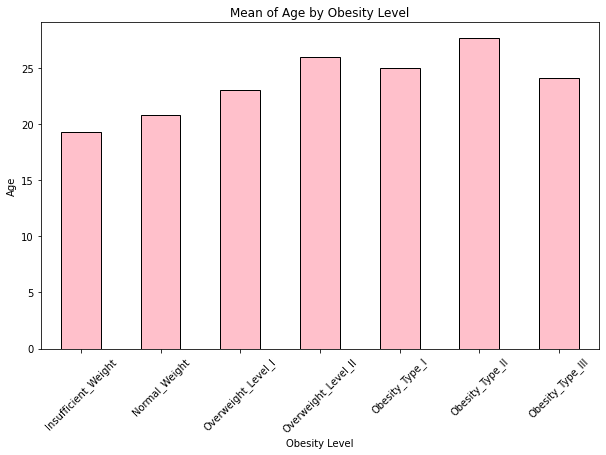

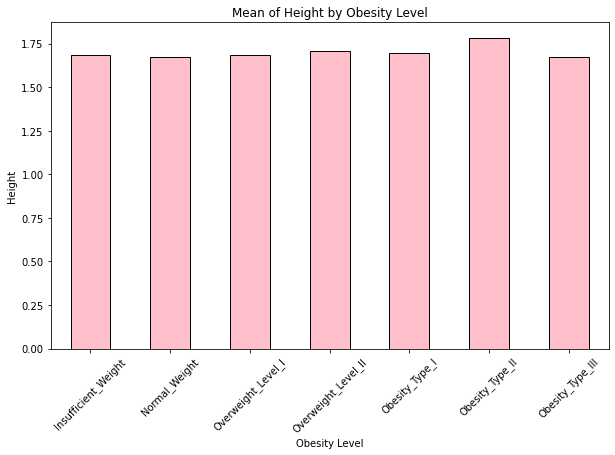

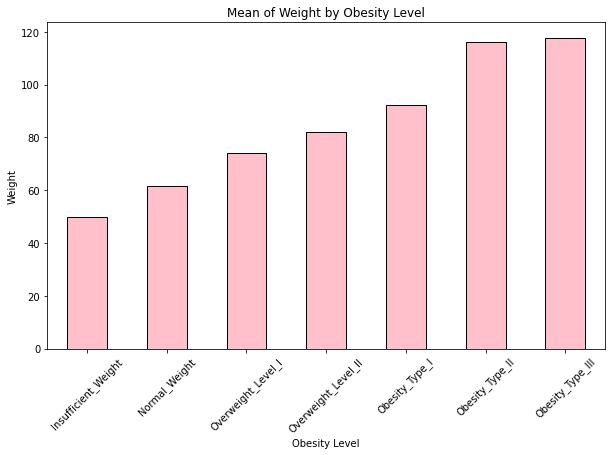

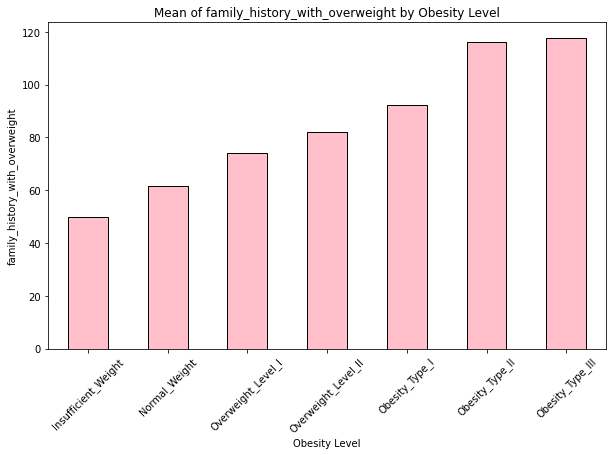

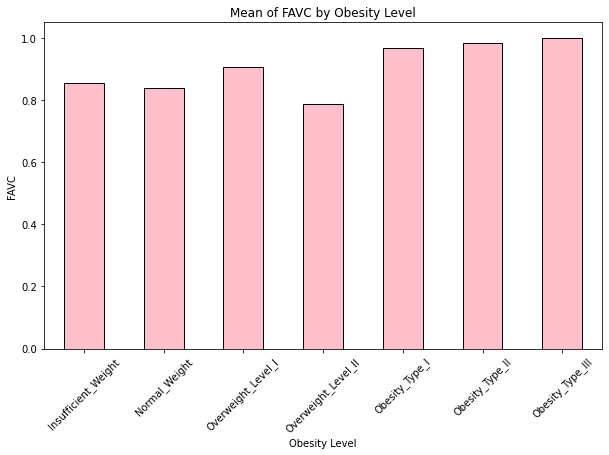

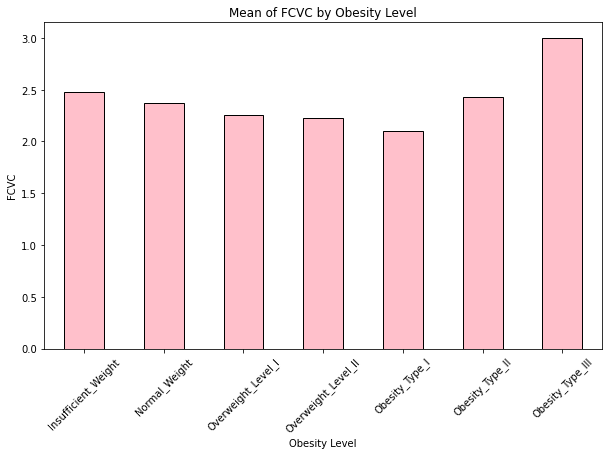

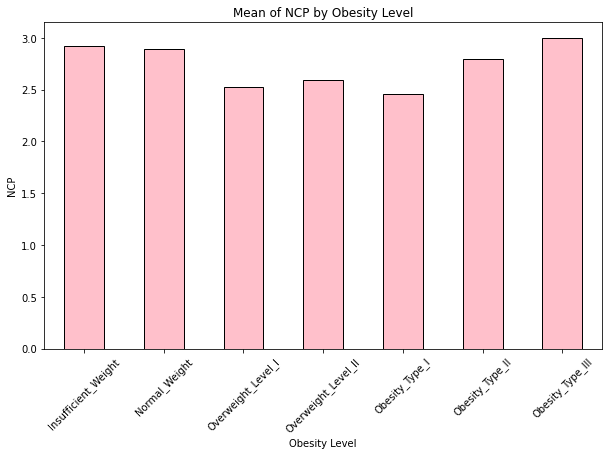

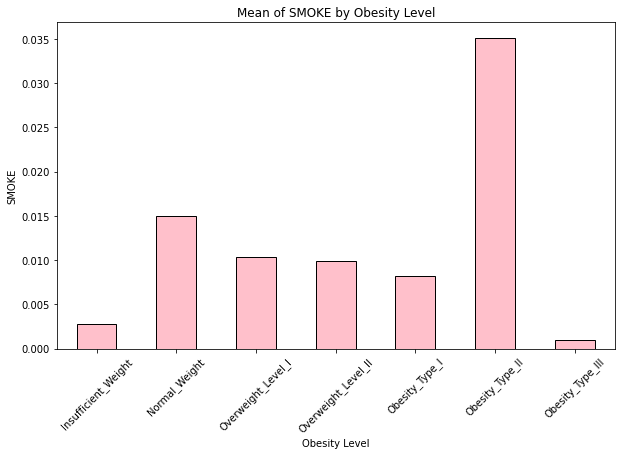

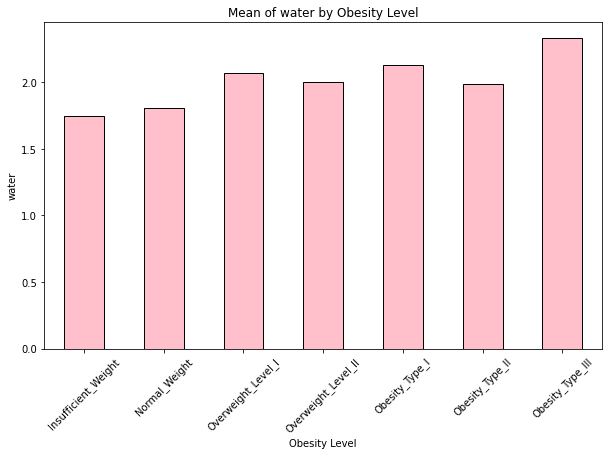

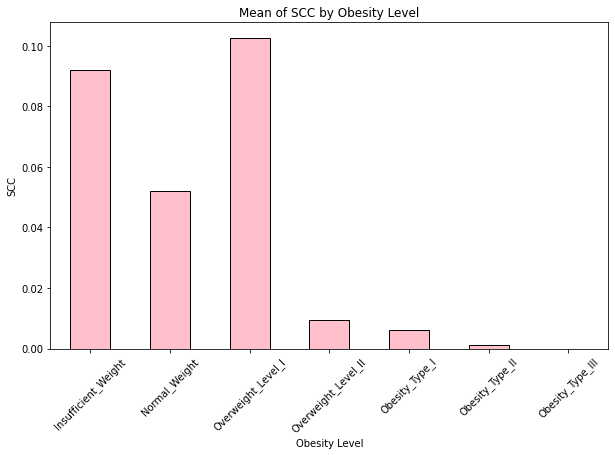

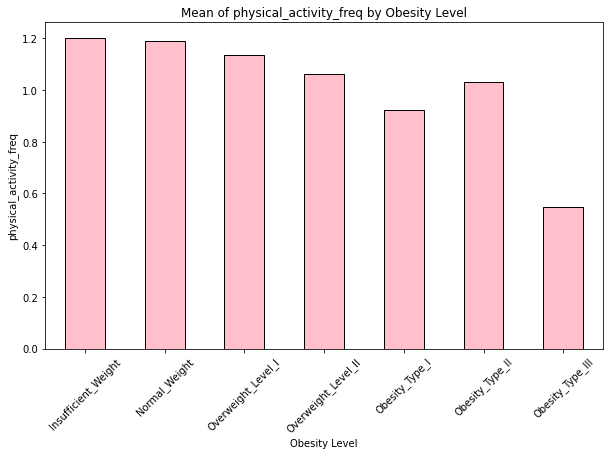

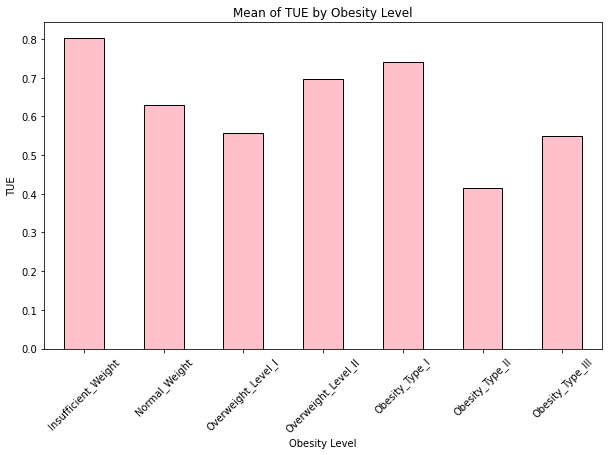

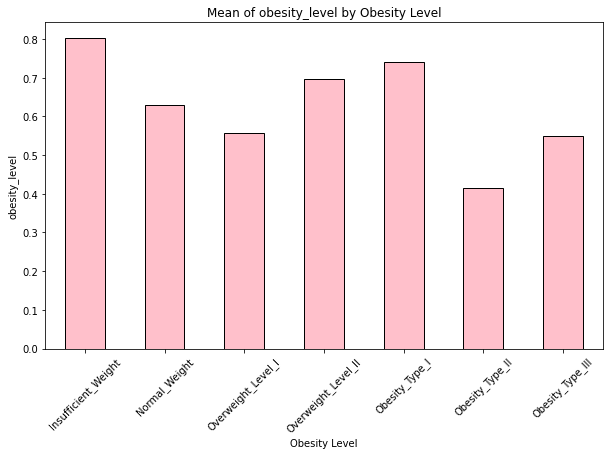

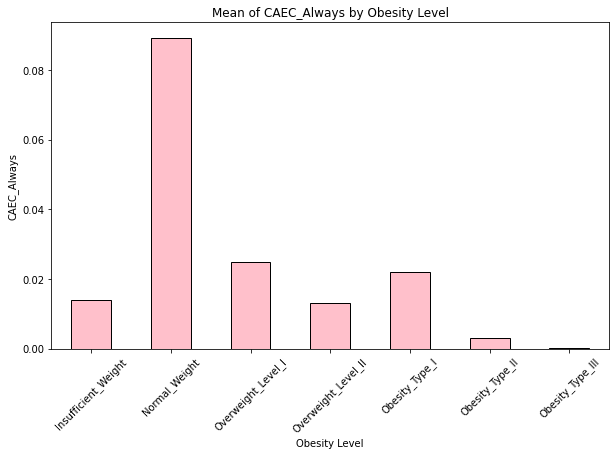

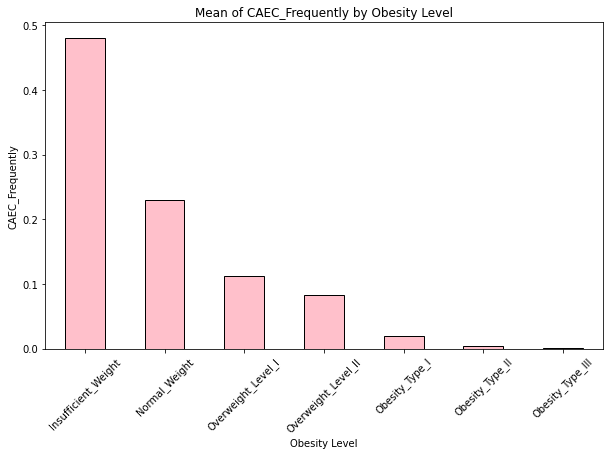

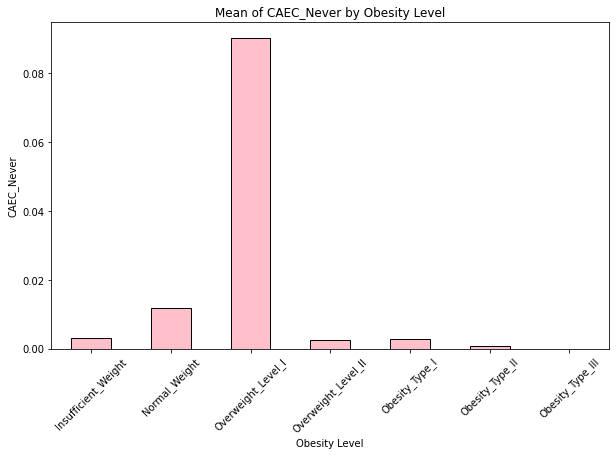

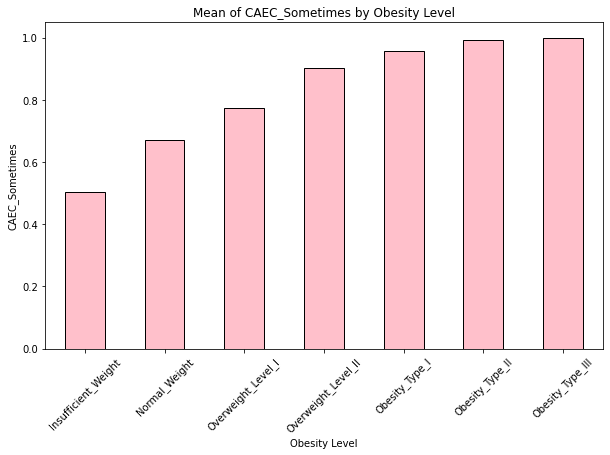

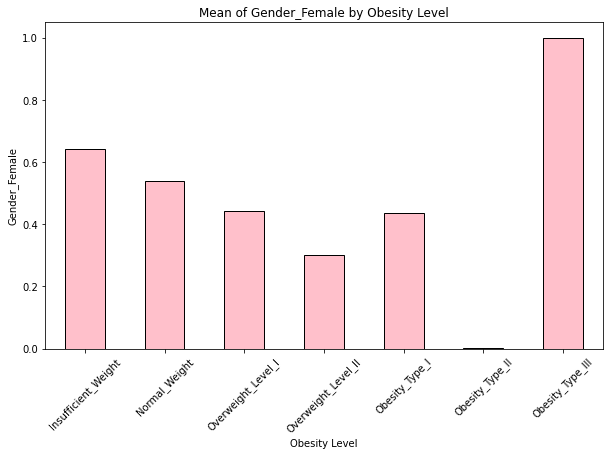

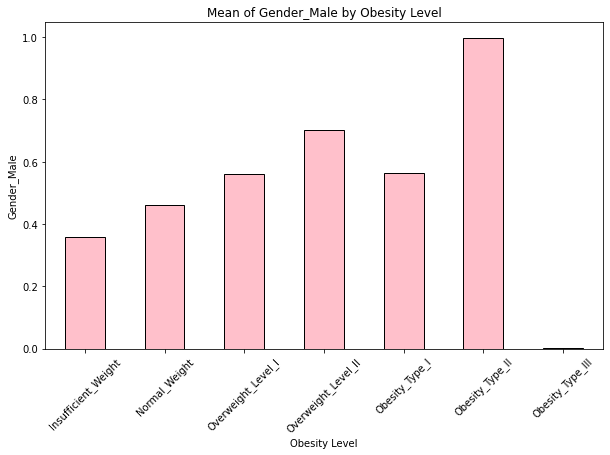

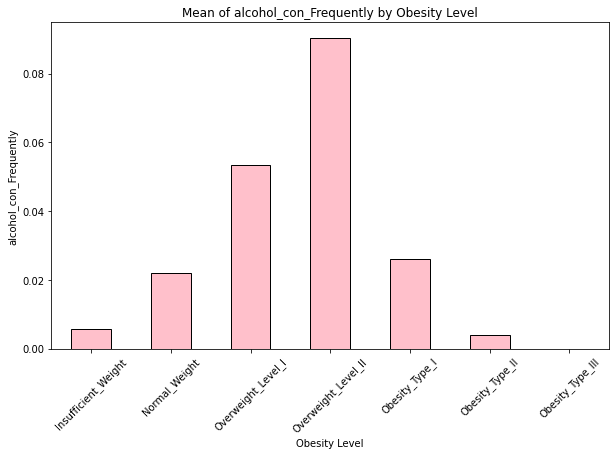

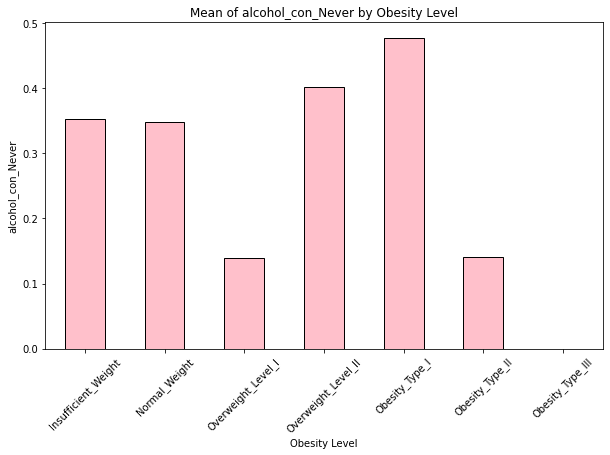

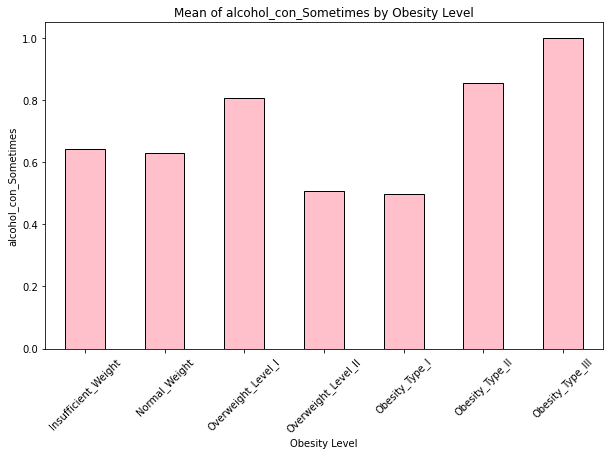

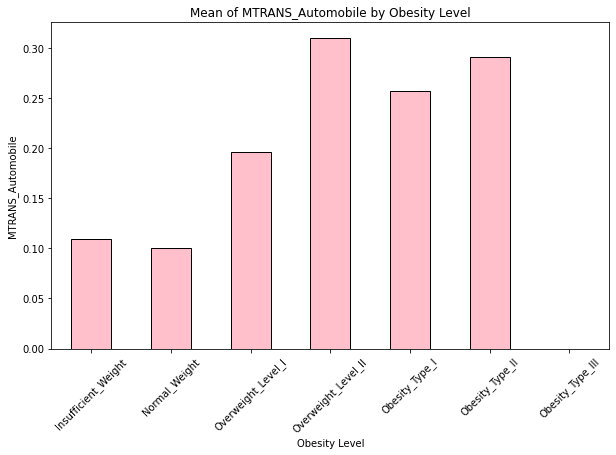

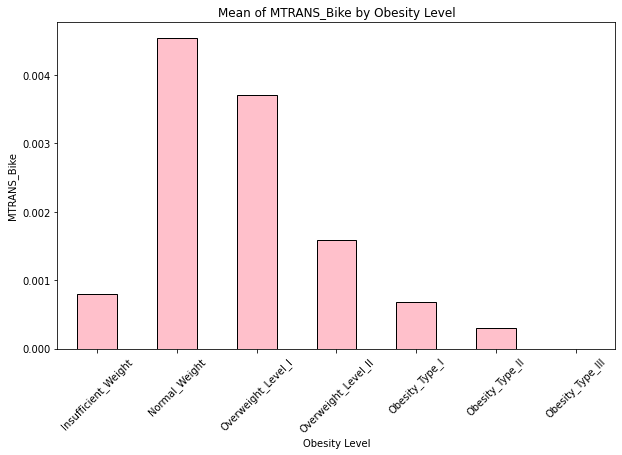

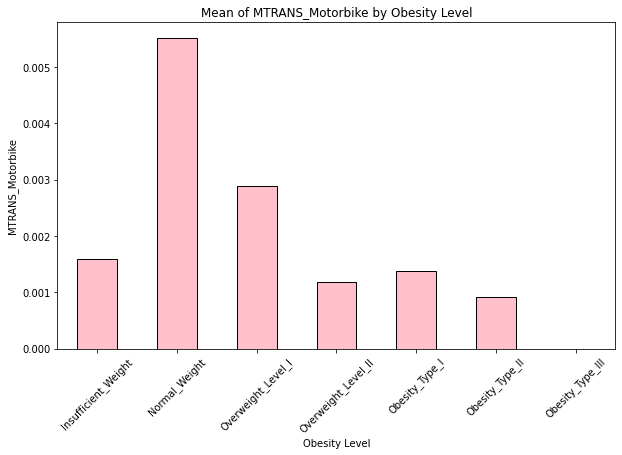

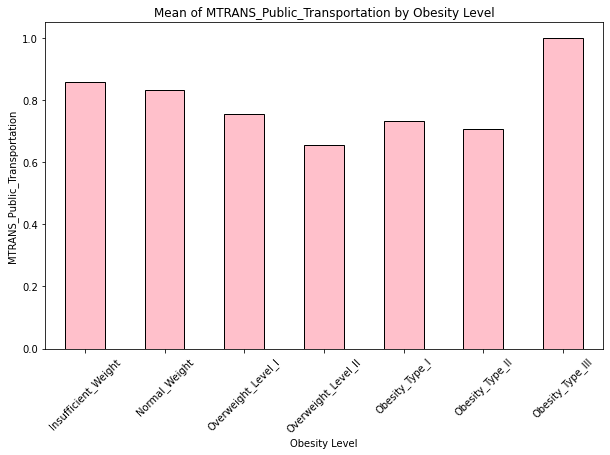

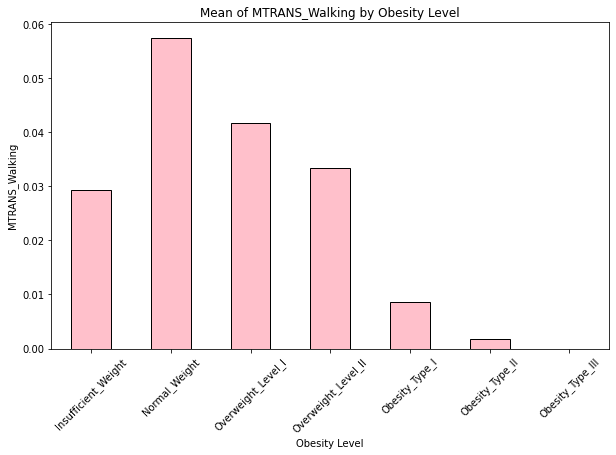

In [94]:
features = df.columns

for feature in features:
    if feature == 'obesity_level' or feature == 'family_history_with_overweight':
        print(' ')
    else:
        grouped_data = df.groupby(['obesity_level'])[feature].mean()
        grouped_data = grouped_data.reindex(['Insufficient_Weight', 'Normal_Weight',  'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])


    plt.figure(figsize=(10,6))
    grouped_data.plot(kind='bar', color='pink', edgecolor='black')
    plt.title("Mean of "+ feature +" by Obesity Level")
    plt.xlabel("Obesity Level")
    plt.ylabel(feature)
    plt.xticks(rotation=45) 
    plt.show()

# Analysis on Histograms

- For the FAVC (Frequent consumption of high-caloric food) mean, Obesity Types I, II, and III had higher values than the other four obesity levels. This suggests that, on average, people with higher obesity levels consume high-caloric foods more frequently than those in lower obesity categories.

- Interestingly, the FCVC (Frequency of consumption of vegetables) was randomly distributed with no clear pattern. However, Obesity Type III had the highest vegetable consumption. This could suggest that there’s a limit to how much vegetables contribute to weight management, especially since some vegetables, like root vegetables and corn, are high in calories.

- Looks like Obesity Type II has the highest smoking rates, which could mean addictive tendencies show up in both food and smoking. Checking alcohol consumption could help figure out if this is more of an addiction pattern or just a coincidence, since alcohol addiction is also possible.

- For the SCC, The data shows that people with insufficient weight and Overweight Level I consume the most caloric beverages, while those in Obesity Type II and III consume the least. This might mean that people with severe obesity cut back on high-caloric drinks—maybe because they’re more health-conscious, changing their diet, or dealing with metabolic effects.

- There is a slow decline in the physical activity frequency and this makes sense.

- CAEC (Consumption of food between meals) is highest for people with normal weight, meaning they snack the most. This could suggest that frequent snacking helps them eat less during main meals, keeping their overall intake balanced. Insufficient weight individuals also snack often, but it doesn’t seem to make them eat more overall. Interestingly, Overweight Level I rarely snacks, which might mean avoiding snacks doesn’t necessarily prevent weight gain. Meanwhile, "sometimes" snacking is common across all obesity levels, but there’s a positive linear trend in the histogram—suggesting that occasional snacking might not be great for weight control. From this, it looks like always snacking might actually be better than snacking sometimes, possibly because frequent snackers eat smaller portions during main meals. A solid hypothesis would be that the more people snack, the less they eat during heavy meals, but this would need further investigation!

- For the gender histograms, the sample was pretty evenly distributed across all levels up to Obesity Level I. But for Obesity Type II, most were men, while Obesity Type III was mostly women. This could also mean that the higher smoking rates in Obesity Type II might be driven by men. The connection between smoking and gender is definitely worth looking into further to see if there’s a clear trend.

- Overweight Level II had the highest frequency of alcohol consumption compared to other groups, which actually goes against my hypothesis about Obesity Type II having addictive tendencies. If Obesity Type II were more prone to addiction, I’d expect them to also have high alcohol consumption, but instead, they mostly fall into the "sometimes consume alcohol" category. This suggests that their higher smoking rates might not be purely due to addiction but could be influenced by other factors like stress, lifestyle, or social habits.

- For transportation, higher obesity levels mostly traveled by automobile, with Overweight Level II and Obesity Type II having the highest usage. In contrast, Normal Weight and Overweight Level I groups relied more on biking and motorbikes.

Public transportation usage was pretty evenly distributed across all groups, showing no clear trend. However, walking was most common among the Normal Weight group, which makes sense since walking is often associated with maintaining a lower weight.

---------------------------

### Investigating gender and smoking habits

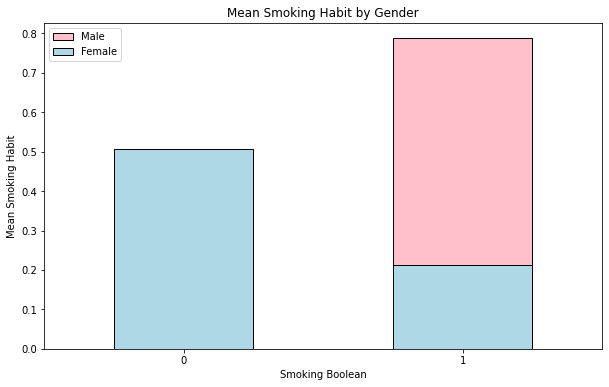

In [95]:
grouped_data = df.groupby(['SMOKE'])['Gender_Male'].mean()

plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', color='pink', edgecolor='black',label = 'Male')
grouped_data = df.groupby(['SMOKE'])['Gender_Female'].mean()
grouped_data.plot(kind='bar', color='lightblue', edgecolor='black',label = 'Female')
plt.title("Mean Smoking Habit by Gender")
plt.xlabel("Smoking Boolean")
plt.ylabel("Mean Smoking Habit")
plt.xticks(rotation=0)
plt.legend()
plt.show()

As expected, the peak in the smoke-obesity distribution for Obesity Type II is likely because most of them were male, and in the smoking distribution, males smoked more than females. This reinforces the idea that the higher smoking rate in Obesity Type II isn’t necessarily due to obesity itself but could be driven by gender differences in smoking habits. Investigating further is beyond the scope of the project.

# Multicollinearity

Next, I'll check for multicollinearity to see if any features are highly correlated. If they are, they’ll be removed during logistic analysis since redundant features don’t add much new information and can distort coefficient interpretations.


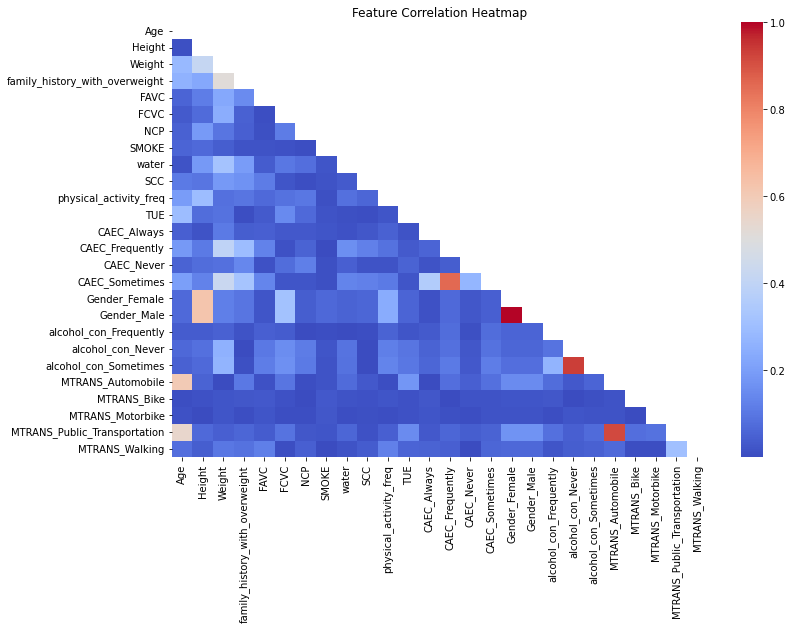

In [96]:
X = df.drop(columns=['obesity_level'])  # Drop target column
corr_matrix = X.corr().abs()
plt.figure(figsize=(12,8))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, mask=matrix)
plt.title("Feature Correlation Heatmap")
plt.show()

When creating dummy variables the first column should be dropped and this is because by keeping all of them perfect multicollinearity will be introduced and this is because one category can be predicted once others are known. Therefore the following columns will get dropped: 

- 'CAEC_Always'
- 'Gender_Female'
- 'alcohol_con_Frequently'
- 'MTRANS_Automobile'

Now with those changes, this will be the new multicollinearity plot



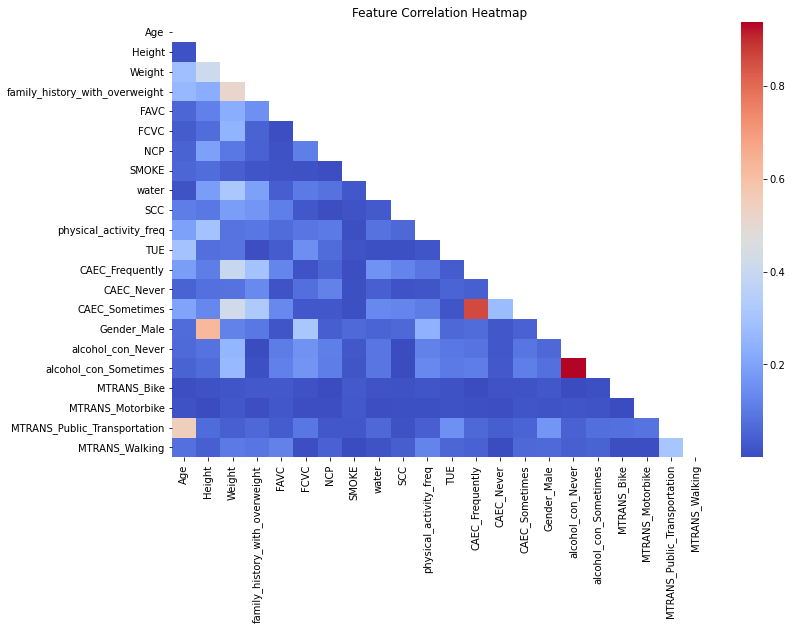

In [97]:
X = df.drop(columns=['obesity_level','CAEC_Always','Gender_Female','alcohol_con_Frequently','MTRANS_Automobile']) 
corr_matrix = X.corr().abs()
plt.figure(figsize=(12,8))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, mask=matrix)
plt.title("Feature Correlation Heatmap")
plt.show()

In [100]:
X = df.drop(columns=['obesity_level','CAEC_Always','Gender_Female','alcohol_con_Frequently','MTRANS_Automobile'])
X_train, X_test, y_train, y_test = train_test_split(X, df["obesity_level"], test_size=0.2, random_state=42)

# I'm scaling the features because the weight is in the hundreds and the other features are in ones. This is to prevent convergance issues.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8648843930635838


Next, a few features are highly correlated. To see which one I should drop, I'll run the logistic regression on either or to see which one improves accuracy. 

Accuracy before testing which one to drop: 0.86488

-----------------------------------------------------------------------

'CAEC_Frequently' vs. 'CAEC_Sometimes'

Accuracy when dropping 'CAEC_Frequently' : 0.86560

Accuracy when dropping 'CAEC_Sometimes' : .86729

Conclusion: Drop 'CAEC_Sometimes'

----------------------------------------------------------------------

'alcohol_con_Sometimes' vs 'alcohol_con_Never'

Accuracy when dropping 'alcohol_con_Sometimes': 0.86536

Accuracy when dropping 'alcohol_con_Never': 0.86753

Conclusion: Drop 'alcohol_con_Never'

----------------------------------------------------------------------

'Gender_Male' vs. 'Height'

Accuracy when dropping 'Gender_Male' : 0.85934

Accuracy when dropping 'Height' : 0.81936

Conclusion: Drop neither! 

In [111]:
X = df.drop(columns=['obesity_level','CAEC_Always','Gender_Female','alcohol_con_Frequently','MTRANS_Automobile', 'CAEC_Sometimes' ,'alcohol_con_Never'])
X_train, X_test, y_train, y_test = train_test_split(X, df["obesity_level"], test_size=0.2, random_state=42)

# I'm scaling the features because the weight is in the hundreds and the other features are in ones. This is to prevent convergance issues.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.867533718689788
